In [1]:
import gpflow
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys
sys.path.append('../')
from GPHetero import hetero_kernels, hetero_likelihoods, hetero_gpmc
from pyDOE import *
import os
from scipy.stats import norm

RuntimeError: module compiled against API version 0xb but this version of numpy is 0xa

RuntimeError: module compiled against API version 0xb but this version of numpy is 0xa

In [2]:
class Ex5Func(object):

    def __init__(self, sigma=lambda x: 0.5):
        self.sigma = sigma

    def __call__(self, x):
        """
        Dette et. al. function.
        Dette, Holger, and Andrey Pepelyshev. "Generalized Latin hypercube design for computer experiments." Technometrics 52, no. 4 (2010): 421-429.

        """
        y = 4 * ((x[0] - 2 + 8 * x[1] - 8 * (x[1] ** 2)) ** 2) + (3 - 4 * x[1]) ** 2 + 16 * np.sqrt(x[2] + 1) * ((2 * x[2] - 1)**2)
        return (y - 50) / 50.

In [3]:
dim = 3
n = 20
noise=0
sigma = eval('lambda x: ' + str(noise))

objective = Ex5Func(sigma=sigma)
X = lhs(dim, n , criterion='center')
Xnorm = (X - 0.5) /0.5
Y = np.array([objective(x) for x in X])[:, None]

In [4]:
#build the model
k = gpflow.kernels.RBF(input_dim=1)
k.lengthscales.prior = gpflow.priors.Gamma(1, 1)
# from copy import copy
# l = copy(k)
noisekern = gpflow.kernels.RBF(input_dim=1)
nonstat = hetero_kernels.NonStationaryLengthscaleRBF()
mean_func = gpflow.mean_functions.Constant(1)
m = hetero_gpmc.GPMCAdaptiveLengthscaleMultDim(Xnorm, Y, k, nonstat, mean_func)

In [5]:
for i in xrange(dim):
    print i
    m.kerns["ell" + str(i)].lengthscales.prior = gpflow.priors.Gamma(1., 1.)
    m.kerns["ell" + str(i)].variance.prior = gpflow.priors.Gamma(1., 1.)
    #m.mean_funcs["ell" + str(i)].c = 3.
    #m.mean_funcs["ell" + str(i)].c.fixed = True 
    #m.mean_funcs["ell" + str(i)].c.prior = gpflow.priors.Gamma(3,3)
m.nonstat.signal_variance.prior = gpflow.priors.Gamma(1., 1.)
# m.nonstat.signal_variance.fixed = True
m.likelihood.variance = 1e-6
m.likelihood.variance.fixed = True

0
1
2


In [6]:
m.mean_funcs["ell" + str(0)].c = 4.
m.mean_funcs["ell" + str(0)].c.fixed = True 
m.mean_funcs["ell" + str(1)].c = 1.
m.mean_funcs["ell" + str(1)].c.fixed = True 
m.mean_funcs["ell" + str(2)].c = 2.
m.mean_funcs["ell" + str(2)].c.fixed = True 

In [7]:
m.optimize(maxiter=1500) # start near MAP

      fun: array([-39.22842462])
 hess_inv: <83x83 LbfgsInvHessProduct with dtype=float64>
      jac: array([  7.38138158e-01,  -4.05976602e-01,   3.22101511e-01,
        -7.04371691e-01,   1.05735678e+00,  -1.01967487e+00,
        -7.91293809e-02,  -2.69047724e-01,   5.29522341e-01,
         5.61075948e-01,  -6.82825429e-01,   4.51707520e-01,
        -1.25545972e+00,   4.59567507e-01,   3.32358910e-01,
         7.61868555e-01,  -1.24233505e-01,   4.73010090e-02,
        -2.75088324e-02,  -9.56236223e-02,  -4.92441780e-01,
         1.66305064e-01,  -1.22352513e-02,  -5.43215654e-02,
         5.05002465e-03,  -2.16017811e-01,   6.72321521e-03,
         2.09543949e-02,  -2.82372589e-01,   5.02047438e-02,
         4.23726560e-02,   2.38722412e-02,  -2.92887522e-02,
        -2.06908562e-02,   6.18815358e-02,  -4.27915588e-01,
        -1.79443223e-02,  -8.80243588e-03,   1.79542255e-02,
         9.67091676e-03,  -1.18916957e-02,  -1.32522000e-02,
        -1.28161246e-02,   3.66175647e-02,  

In [8]:
m

Name,values,prior,constraint
adaptive_lengthscale_gp_multdim.V,[[ -1.73341579e-01 2.54848453e-01 -1.68535334e-01] [ -5.37091030e-01 2.25783579e-02 -8.08344291e-01] [ 2.96104600e-01 -3.19766420e-01 -5.39808428e-01] [ 1.43053971e-01 -6.80323738e-01 -1.24457554e-01] [ -1.77857692e-01 2.38767021e-02 -3.91707554e-02] [ -6.48306276e-02 -1.29983758e-02 3.57070282e-02] [ 1.09803287e-05 -2.18606983e-02 2.69263669e-02] [ -8.77708692e-03 -2.04080743e-02 3.32524557e-03] [ -1.30685771e-02 5.87431160e-02 -9.34331214e-03] [ 4.82912074e-03 2.65386264e-02 -6.28812583e-03] [ 1.40800119e-03 8.35354571e-03 -1.85744732e-02] [ -2.19602008e-03 7.08987792e-03 -5.36512632e-03] [ 2.74834540e-03 3.37980214e-05 -1.38296169e-02] [ 3.53142192e-03 -5.80544610e-03 3.34840345e-03] [ 1.07630007e-02 1.69685940e-02 -2.07406150e-02] [ -1.31868272e-03 2.03157036e-02 -1.95506872e-02] [ -2.31334510e-03 1.46537860e-02 -1.07225923e-02] [ 1.31434902e-03 -1.03267395e-02 1.68481011e-02] [ -1.08481228e-03 -1.48821672e-02 2.31949110e-02] [ 3.46913563e-04 4.40010447e-03 -7.71867908e-03]],"N([ 0.],[ 1.])",(none)
adaptive_lengthscale_gp_multdim.V4,[[-0.57188187] [-0.50793772] [-0.34892079] [ 0.18922985] [-0.16939163] [-0.11551108] [ 0.18478888] [ 0.30595567] [-0.0843684 ] [-0.30632627] [-0.76086867] [ 0.2219195 ] [-0.23014618] [-0.18131143] [-0.47032576] [ 0.01176195] [-0.08063348] [ 0.184781 ] [ 0.30172996] [-0.12672064]],"N([ 0.],[ 1.])",(none)
adaptive_lengthscale_gp_multdim.kern_type.lengthscales,[ 0.40085459],"Ga([ 1.],[ 1.])",+ve
adaptive_lengthscale_gp_multdim.kern_type.variance,[ 1.47815725],"Ga([ 1.],[ 1.])",+ve
adaptive_lengthscale_gp_multdim.likelihood.variance,[ 1.00000000e-06],None,[FIXED]
adaptive_lengthscale_gp_multdim.mean_func.c,[ 2.],None,[FIXED]
adaptive_lengthscale_gp_multdim.nonstat.signal_variance,[ 1.41120509],"Ga([ 1.],[ 1.])",+ve


In [9]:
mcmc_samples = 1000
num_samp_gp = 1

In [10]:
samples = m.sample(mcmc_samples, verbose=True, epsilon=0.00005, thin = 2, burn = 500, Lmax = 20)

burn-in sampling started
Iteration:  100 	 Acc Rate:  98.0 %
Iteration:  200 	 Acc Rate:  100.0 %
Iteration:  300 	 Acc Rate:  100.0 %
Iteration:  400 	 Acc Rate:  100.0 %
Iteration:  500 	 Acc Rate:  100.0 %
burn-in sampling ended
Iteration:  100 	 Acc Rate:  98.0 %
Iteration:  200 	 Acc Rate:  99.0 %
Iteration:  300 	 Acc Rate:  100.0 %
Iteration:  400 	 Acc Rate:  100.0 %
Iteration:  500 	 Acc Rate:  97.0 %
Iteration:  600 	 Acc Rate:  99.0 %
Iteration:  700 	 Acc Rate:  100.0 %
Iteration:  800 	 Acc Rate:  100.0 %
Iteration:  900 	 Acc Rate:  99.0 %
Iteration:  1000 	 Acc Rate:  100.0 %
Iteration:  1100 	 Acc Rate:  100.0 %
Iteration:  1200 	 Acc Rate:  98.0 %
Iteration:  1300 	 Acc Rate:  100.0 %
Iteration:  1400 	 Acc Rate:  100.0 %
Iteration:  1500 	 Acc Rate:  100.0 %
Iteration:  1600 	 Acc Rate:  100.0 %
Iteration:  1700 	 Acc Rate:  100.0 %
Iteration:  1800 	 Acc Rate:  100.0 %
Iteration:  1900 	 Acc Rate:  100.0 %
Iteration:  2000 	 Acc Rate:  99.0 %


In [11]:
m

Name,values,prior,constraint
adaptive_lengthscale_gp_multdim.V,[[ -1.73341579e-01 2.54848453e-01 -1.68535334e-01] [ -5.37091030e-01 2.25783579e-02 -8.08344291e-01] [ 2.96104600e-01 -3.19766420e-01 -5.39808428e-01] [ 1.43053971e-01 -6.80323738e-01 -1.24457554e-01] [ -1.77857692e-01 2.38767021e-02 -3.91707554e-02] [ -6.48306276e-02 -1.29983758e-02 3.57070282e-02] [ 1.09803287e-05 -2.18606983e-02 2.69263669e-02] [ -8.77708692e-03 -2.04080743e-02 3.32524557e-03] [ -1.30685771e-02 5.87431160e-02 -9.34331214e-03] [ 4.82912074e-03 2.65386264e-02 -6.28812583e-03] [ 1.40800119e-03 8.35354571e-03 -1.85744732e-02] [ -2.19602008e-03 7.08987792e-03 -5.36512632e-03] [ 2.74834540e-03 3.37980214e-05 -1.38296169e-02] [ 3.53142192e-03 -5.80544610e-03 3.34840345e-03] [ 1.07630007e-02 1.69685940e-02 -2.07406150e-02] [ -1.31868272e-03 2.03157036e-02 -1.95506872e-02] [ -2.31334510e-03 1.46537860e-02 -1.07225923e-02] [ 1.31434902e-03 -1.03267395e-02 1.68481011e-02] [ -1.08481228e-03 -1.48821672e-02 2.31949110e-02] [ 3.46913563e-04 4.40010447e-03 -7.71867908e-03]],"N([ 0.],[ 1.])",(none)
adaptive_lengthscale_gp_multdim.V4,[[-0.57188187] [-0.50793772] [-0.34892079] [ 0.18922985] [-0.16939163] [-0.11551108] [ 0.18478888] [ 0.30595567] [-0.0843684 ] [-0.30632627] [-0.76086867] [ 0.2219195 ] [-0.23014618] [-0.18131143] [-0.47032576] [ 0.01176195] [-0.08063348] [ 0.184781 ] [ 0.30172996] [-0.12672064]],"N([ 0.],[ 1.])",(none)
adaptive_lengthscale_gp_multdim.kern_type.lengthscales,[ 0.40085459],"Ga([ 1.],[ 1.])",+ve
adaptive_lengthscale_gp_multdim.kern_type.variance,[ 1.47815725],"Ga([ 1.],[ 1.])",+ve
adaptive_lengthscale_gp_multdim.likelihood.variance,[ 1.00000000e-06],None,[FIXED]
adaptive_lengthscale_gp_multdim.mean_func.c,[ 2.],None,[FIXED]
adaptive_lengthscale_gp_multdim.nonstat.signal_variance,[ 1.41120509],"Ga([ 1.],[ 1.])",+ve


In [12]:
X_test = lhs(dim, n , criterion='center')
X_test_norm = (X_test - 0.5) /0.5
Y_test = np.array([objective(x) for x in X])[:, None]

In [13]:
samples.shape

(1000, 83)

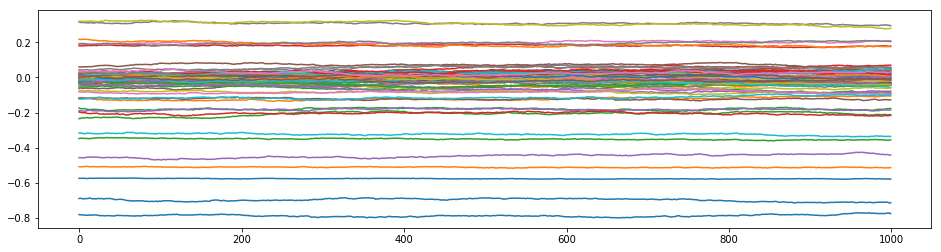

In [14]:
plt.figure(figsize=(16, 4))
plt.plot(samples[:,10:80])

In [15]:
X_test = lhs(dim, 100 , criterion='center')
X_test_norm = (X_test - 0.5) /0.5
Y_test = np.array([objective(x) for x in X_test])[:, None]

In [16]:
sample_df = m.get_samples_df(samples)
mean_f_mat = np.zeros(shape=(sample_df.shape[0], X_test_norm.shape[0]))
var_f_mat = np.zeros(shape=(sample_df.shape[0], X_test_norm.shape[0]))

In [17]:
for i, s in sample_df.iterrows():
    m.set_parameter_dict(s)
    mean_f, var_f = m.predict(X_test_norm)
    mean_f_mat[i, :] = mean_f[:,0]
    var_f_mat[i, :] = np.diag(var_f)

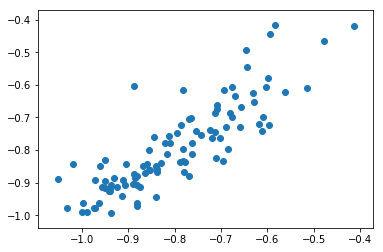

In [19]:
plt.scatter(mean_f_mat[1,:], Y_test)